<a href="https://colab.research.google.com/github/ankur26nashier/Machine_learning_COMP7220_8220/blob/master/45690243_assessed_task_2_Ankur_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assessed Task 2: COMP7220/8220

For this assignment, you will use the Pima Indians Diabetes Dataset that comes originally from the National Institute of Diabetes and Digestive and Kidney Disease. The data is available in a single csv file but since it is real world data it contains a number of null values. The assignment follows the workflow of a simple data science project and you will use a K-nearest neighbor classifier for the following 10 tasks. 

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

random_state = 42

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#%ls 'drive/My Drive/Colab Notebooks/'

df = pd.read_csv('drive/My Drive/Colab Notebooks/pima-indians-diabetes.csv')

#
url='https://github.com/ankur26nashier/Machine_learning_COMP7220_8220/raw/master/pima-indians-diabetes.csv'
df_url = pd.read_csv(url)
#Method 2 
#url = 'copied_raw_GH_link'
#df1 = pd.read_csv(url)

In [0]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [0]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## A. Pre-processing

**Task 1**: Replace all null values in the data frame (apart from values in the Pregnancies and Outcome columns) by NaN, then display the head of the data frame and print out the number of missing values for each feature.  [1 mark]

In [10]:
# Your code goes here.
# First do task with new sub dataset ....then make changes directly to main dataset with inplace command

df2=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
df2.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33


In [11]:
NullCountDict={}
exception=['Pregnancies','Outcome']
for i in df:
    #print(i)
    c=0
    if i in exception:
        NullCountDict[i]=c
        continue;
    for j in df[i]:
        #print(j)
        if j==0 :
            c=c+1
    #df[i][j].replace(0, np.nan)
            #print(df[i][j])
    NullCountDict[i]=c
    

NullDf = pd.DataFrame.from_dict(NullCountDict, orient='index')
print('Number of missing Values per Feature: \n',NullDf)

# df.applymap(lambda x: np.nan if x == 0 else x)

Number of missing Values per Feature: 
                             0
Pregnancies                 0
Glucose                     5
BloodPressure              35
SkinThickness             227
Insulin                   374
BMI                        11
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0


In [12]:
PpColumns=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
df[PpColumns]=df[PpColumns].replace(0,np.nan)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [0]:
# Your code goes here.

**Task 2**: Import the SimpleImputer class from sklearn.impute, then use the mean as strategy to replace all NaNs, fit and transform the modfied data frame (using the fit_transform() function) and print again the number of missing values for each feature. [1 mark]

In [0]:
# Your code goes here.
from sklearn.impute import SimpleImputer
#imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [0]:
#df['Glucose'].mean()
# replace nan with col means 
#res = np.where(np.isnan(df), np.ma.array(df, mask = np.isnan(df)).mean(axis = 0), df)    
#pd.DataFrame(res)
# printing final array 
#print ("final array", res) 
#res
#df3=

#df3
#df

#df[PpColumns]=df[PpColumns].replace(np.nan,df[PpColumns].mean)

# #f = df.apply(lambda x: x.fillna(x.mean()),axis=0)
"""'''for i in df:
    #print(i)
    c=0
    df.fillna(df.groupby(i).transform('mean'))

df'''"""

#df_array=np.array(df)


In [13]:
#np.ma.array(df, mask = np.isnan(df)).mean(axis = 0)
#np.where(np.isnan(df), np.ma.array(df, mask = np.isnan(df)).mean(axis = 0), df)  
df = df.apply(lambda x: x.fillna(x.mean()),axis=0)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [14]:

NullCountDict={}
exception=['Pregnancies','Outcome']
for i in df:
    #print(i)
    c=0
    if i in exception:
        NullCountDict[i]=c
        continue;
    for j in df[i]:
        #print(j)
        if j==0 :
            c=c+1
        if j==np.nan :
            c=c+1
    #df[i][j].replace(0, np.nan)
            #print(df[i][j])
    NullCountDict[i]=c
    

NullDf = pd.DataFrame.from_dict(NullCountDict, orient='index')
print('Number of missing Values per Feature: \n',NullDf)

Number of missing Values per Feature: 
                           0
Pregnancies               0
Glucose                   0
BloodPressure             0
SkinThickness             0
Insulin                   0
BMI                       0
DiabetesPedigreeFunction  0
Age                       0
Outcome                   0


## B. Scaling

Distribution of values before scaling

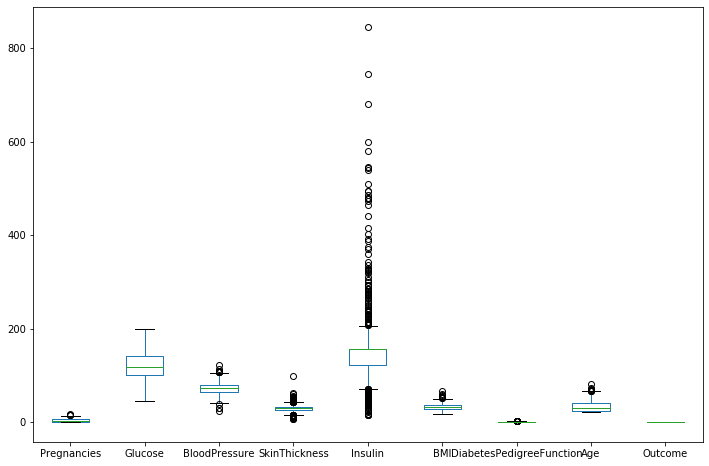

In [0]:
df.plot(kind='box', figsize=(12, 8));

**Train 3:** Import the MinMaxScaler scaler class from sklearn.preprocessing, fit and transform the data and plot the normalised data (using a box plot) in order to display the distribution of values after scaling. [1 mark]

In [39]:
import nltk
import sklearn
print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

#from sklearn import preprocessing, metrics, cross_validation

The nltk version is 3.2.5.
The scikit-learn version is 0.22.2.post1.


In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
# Your code goes here.

**Task 4**: Split the data frame into a training set (X_train, y_train) and a test set (X_test, y_test), use 0.33 as test size and the previously defined random_state parameter (42). [1 mark]

In [16]:
# Your code goes here.
from sklearn.model_selection import train_test_split
df1=df.drop('Outcome', axis=1)
df1
train, test = train_test_split(df, test_size=0.2, random_state=42)
print('test.shape',test.shape,'\n train.shape', train.shape)
#print(train.shape)


test.shape (154, 9) 
 train.shape (614, 9)


# C. Train and Evaluate the Model

**Task 5**: Import the KNeighborsClassifier from sklearn.neighbors, set n_neighbors to 5, fit the model, make predications (using X_test) and report the accuracy of the classifier (using the accuracy_score() function from sklearn.metrics). [1 mark]

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train= train.drop('Outcome', axis=1)
X_test= test.drop('Outcome', axis=1)
y_train=train['Outcome']
y_test=test['Outcome']

In [26]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [25]:
ypred = neigh.predict(X_test)
acc = accuracy_score(y_true=y_test, y_pred=ypred)
print('Accuracy: {:.4f}'.format(acc))

Accuracy: 0.6494


**Task 6:** Report precision, recall and f1-score for the classifier (using the classification_report() function from sklearn.metrics). [1 mark]

In [29]:
# Your code goes here.
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71        99
           1       0.51      0.62      0.56        55

    accuracy                           0.65       154
   macro avg       0.63      0.64      0.63       154
weighted avg       0.67      0.65      0.66       154



**Task 7:** Import the cross_value_score function from sklearn.model_selection, use 10-fold cross validation and report the accuracy of the classifier. [1 mark]

In [32]:
# Your code goes here.
from sklearn.model_selection import cross_val_score
print(cross_val_score(neigh, df.drop('Outcome', axis=1), df['Outcome'], cv=10))

[0.64935065 0.75324675 0.68831169 0.68831169 0.68831169 0.72727273
 0.7012987  0.79220779 0.69736842 0.73684211]


**Task 8**: Import the cross_val_predict function from sklearn.model_selection and compute again precision, recall and F1-score for the classifier. The output wil look similar to the output of Task 6. [1 mark]

In [36]:
# Your code goes here.
from sklearn.model_selection import cross_val_predict
y_pred2 = cross_val_predict(neigh,X_test, y_test, cv=10)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80        99
           1       0.64      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



**Task 9**: Generate a confusion matrix and print the number of true negatives, false positives, false negatives, and true positives for the classification.

In [37]:
# Your code goes here.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred2)

array([[79, 20],
       [19, 36]])

**Task 10**: Evaluate alternative values for K and plot the error rate versus the K-values. 

In [0]:
# Your code goes here.